In [1]:
%matplotlib inline
#
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [2]:
class Load:
    
    def __init__(self):
        return
    
    def img(file):
        img = cv.imread("../res/"+file+".jpg")
        return img
    def photo(i):
        photos = []
        for j in range(1, 19):
            photos.append('projekt' + str(j))
        plt.imshow(Load.img(photos[i]))
        return 

In [3]:
a = interact(Load.photo, i=(0,17, 1));

interactive(children=(IntSlider(value=8, description='i', max=17), Output()), _dom_classes=('widget-interact',…

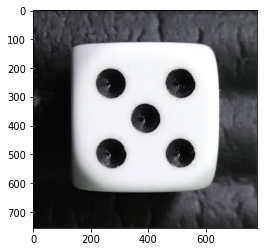

In [3]:
latwe0 = Load.img("latwe0")
plt.imshow(latwe0)

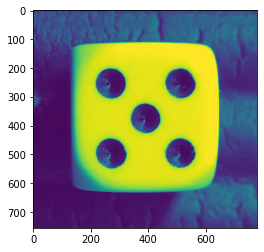

In [5]:
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)
plt.imshow(latwe0_grayscale)

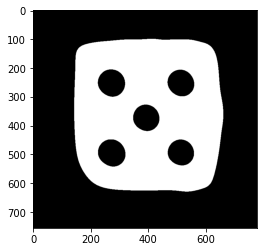

In [6]:
blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)
plt.imshow(latwe0_normalized, cmap='gray')

6

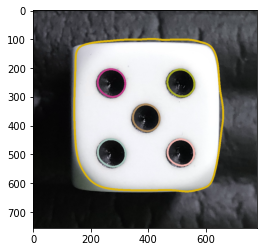

In [20]:
contours, hierarchy = cv.findContours(latwe0_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((latwe0_normalized.shape[0], latwe0_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(latwe0, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(latwe0, cmap='gray')

In [21]:
max_contour = 0
oczka = []
for i in contours:
    if cv.contourArea(i) > max_contour:
        max_contour = cv.contourArea(i)
for i in contours:
    if cv.contourArea(i) != max_contour:
        oczka.append(i)

print(len(oczka))

5


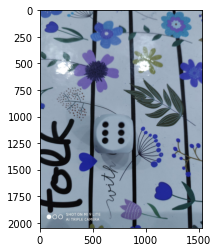

In [10]:
projekt1 = Load.img("projekt1")
plt.imshow(projekt1)
interact()

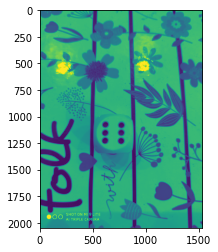

In [11]:
projekt1_grayscale = cv.cvtColor(projekt1, cv.COLOR_RGB2GRAY)
plt.imshow(projekt1_grayscale)

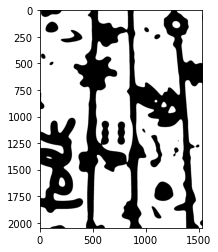

In [12]:
blur = skimage.filters.gaussian(projekt1_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
projekt1_normalized = mask.astype(np.uint8)
plt.imshow(projekt1_normalized, cmap='gray')

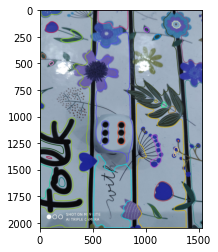

In [13]:
contours, hierarchy = cv.findContours(projekt1_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((projekt1_normalized.shape[0], projekt1_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(projekt1, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(projekt1, cmap='gray')

In [5]:
import imutils

In [6]:
image = Load.img("latwe0")
image_blur = cv.medianBlur(image,25)
image_blur_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
image_res ,image_thresh = cv.threshold(image_blur_gray,240,255,cv.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(image_thresh,cv.MORPH_OPEN,kernel) 
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, last_image =  cv.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

cnts = cv.findContours(last_image.copy(), cv.RETR_EXTERNAL,
	cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

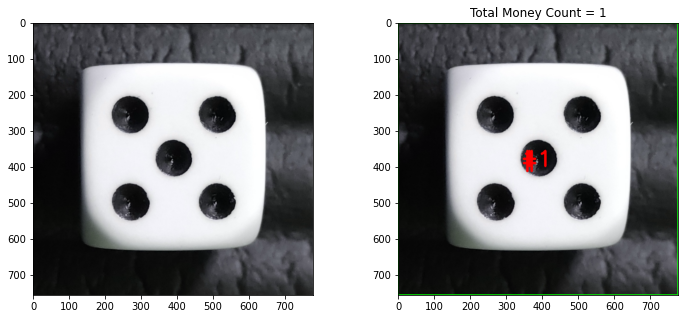

In [10]:
def display(img,count,cmap="gray"):
    f_image = Load.img("latwe0")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Money Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv.minEnclosingCircle(c)
	cv.putText(image, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))

In [ ]:
latwe0 = Load.img("latwe3")
#output = latwe0.copy()
gray = cv.cvtColor(latwe0, cv.COLOR_BGR2GRAY)

# detect circles in the image
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.2, 100)
print(circles)

#if circles is not None:

#	circles = np.round(circles[0, :]).astype("int")

#	for (x, y, r) in circles:
#		cv.circle(output, (x, y), r, (0, 255, 0), 4)
#		cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
#	plt.imshow(output)


#plt.imshow(latwe0_normalized, cmap='gray')